<a href="https://colab.research.google.com/github/Gops03/Ejercicios/blob/main/YOUTUBEDETECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#cargar datos desde drive acceso libre
FILEID = "16yxP3k7H_XJxUy8AkFoe101hLIMKI3Qt"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2023-10-19 22:52:42--  https://docs.google.com/uc?export=download&confirm=&id=16yxP3k7H_XJxUy8AkFoe101hLIMKI3Qt
Resolving docs.google.com (docs.google.com)... 142.250.125.102, 142.250.125.139, 142.250.125.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n6sgickg8ul25o9boinrmbp6k29gq5md/1697755950000/06462550214877793921/*/16yxP3k7H_XJxUy8AkFoe101hLIMKI3Qt?e=download&uuid=8e7961bd-97b9-472d-9454-bae1fb8b2ef2 [following]
--2023-10-19 22:52:42--  https://doc-0g-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n6sgickg8ul25o9boinrmbp6k29gq5md/1697755950000/06462550214877793921/*/16yxP3k7H_XJxUy8AkFoe101hLIMKI3Qt?e=download&uuid=8e7961bd-97b9-472d-9454-bae1fb8b2ef2
Resolving doc-0g-b8-docs.googleusercontent.com (doc-0g-b8-docs.googleusercontent.com)... 64.233.182.13

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,LINK,AUTOR,GENERO,NUM
0,https://www.youtube.com/watch?v=IH-r_KvecY4&ab...,MBZ,RAP,1
1,https://www.youtube.com/watch?v=hctMB2pQkyY&ab...,GRANUJA,RAP,1
2,https://www.youtube.com/watch?v=bWgfV-WHOiE&ab...,METRICAS FRIAS,RAP,1
3,https://www.youtube.com/watch?v=xbO6O7J4ohk&ab...,EL JOSE,RAP,1
4,https://www.youtube.com/watch?v=QYaWF0Soj_8&ab...,NOISEFERATU,RAP,1
5,https://www.youtube.com/watch?v=QLZtU2iJBV4&ab...,ZOF ZIRO,RAP,1
6,https://www.youtube.com/watch?v=xJTLM5CmWDI&ab...,ALCOHOLIRIKOS,RAP,1
7,https://www.youtube.com/watch?v=2LQj8BiYeRM&ab...,ARKEOLOGO,RAP,1
8,https://www.youtube.com/watch?v=11IWuxAMEn8&ab...,CANSERBERO,RAP,1
9,https://www.youtube.com/watch?v=wYu9_0sKrS0&ab...,NACH,RAP,1


In [40]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-11.0.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (129 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (138 kB)
  Using cached idna-3.4-py3-none

In [41]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('resultados')
except:
  print("Carpeta resultadoss ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"LINK: {X.loc[n,'LINK']}\n")
    print(f"AUTOR: {X.loc[n,'AUTOR']}\n")
    print(f"GENERO: {X.loc[n,'GENERO']}\n")
    #ruta video n-th
    name_ = 'resultados/'+X.loc[n,'AUTOR']+"_"+str(n)+"_"+str(X.loc[n,'NUM']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'LINK'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

Carpeta resultadoss ya existe
video 1 de 20
LINK: https://www.youtube.com/watch?v=IH-r_KvecY4&ab_channel=Moebiuz

AUTOR: MBZ

GENERO: RAP

[youtube] Extracting URL: https://www.youtube.com/watch?v=IH-r_KvecY4&ab_channel=Moebiuz
[youtube] IH-r_KvecY4: Downloading webpage
[youtube] IH-r_KvecY4: Downloading ios player API JSON
[youtube] IH-r_KvecY4: Downloading android player API JSON
[youtube] IH-r_KvecY4: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=IH-r_KvecY4
[youtube] IH-r_KvecY4: Downloading webpage
[youtube] IH-r_KvecY4: Downloading ios player API JSON
[youtube] IH-r_KvecY4: Downloading android player API JSON
[youtube] IH-r_KvecY4: Downloading m3u8 information
[info] IH-r_KvecY4: Downloading 1 format(s): 251
[download] resultados/MBZ_0_1.mp3 has already been downloaded
[download] 100% of    3.09MiB
Download complete... resultados/MBZ_0_1.mp3
video 2 de 20
LINK: https://www.youtube.com/watch?v=hctMB2pQkyY&ab_channel=Granuja-Topic

AUTOR: GR

In [42]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'resultados/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['K93_12_2.wav',
 'ODIO A BOTERO_15_2.wav',
 'ODIO A BOTERO_14_2.wav',
 'EL JOSE_3_1.wav',
 'K93_11_2.wav',
 'NACH_9_1.wav',
 'PESTES MUTANTEX_13_2.wav',
 'METRICAS FRIAS_2_1.wav',
 'MBZ_0_1.wav',
 'LOS SUZIOX_17_2.wav',
 'CHITE_10_2.wav',
 'GRANUJA_1_1.wav',
 'VVV_18_2.wav',
 'NOISEFERATU_4_1.wav',
 'ALCOHOLIRIKOS_6_1.wav',
 'CANSERBERO_8_1.wav',
 'ZOF ZIRO_5_1.wav',
 'O.D.I.O_19_2.wav',
 'LA PESTILENCIA_16_2.wav',
 'ARKEOLOGO_7_1.wav']

In [43]:
!pip install soundfile #instalar sondfile

In [45]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: K93_12_2.wav; segundo 40:45; tipo música [2.]
1 lectura: K93_12_2.wav; segundo 50:55; tipo música [2.]
2 lectura: K93_12_2.wav; segundo 60:65; tipo música [2.]
3 lectura: K93_12_2.wav; segundo 70:75; tipo música [2.]
4 lectura: ODIO A BOTERO_15_2.wav; segundo 40:45; tipo música [2.]
5 lectura: ODIO A BOTERO_15_2.wav; segundo 50:55; tipo música [2.]
6 lectura: ODIO A BOTERO_15_2.wav; segundo 60:65; tipo música [2.]
7 lectura: ODIO A BOTERO_15_2.wav; segundo 70:75; tipo música [2.]
8 lectura: ODIO A BOTERO_14_2.wav; segundo 40:45; tipo música [2.]
9 lectura: ODIO A BOTERO_14_2.wav; segundo 50:55; tipo música [2.]
10 lectura: ODIO A BOTERO_14_2.wav; segundo 60:65; tipo música [2.]
11 lectura: ODIO A BOTERO_14_2.wav; segundo 70:75; tipo música [2.]
12 lectura: EL JOSE_3_1.wav; segundo 40:45; tipo música [1.]
13 lectura: EL JOSE_3_1.wav; segundo 50:55; tipo música [1.]
14 lectura: EL JOSE_3_1.wav; segundo 60:65; tipo música [1.]
15 lectura: EL JOSE_3_1.wav; segundo 70:75; tipo mú

(80, 240000, 2)

In [46]:
from IPython.display import Audio #reproducir segmento
i = 10
Audio(x_t[i].T,rate=fs)

In [47]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(80, 120001)

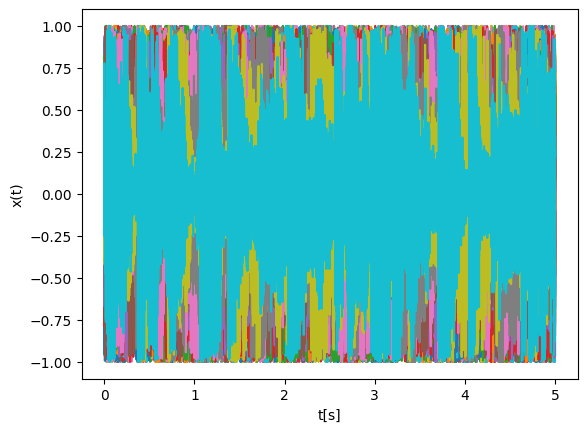

In [48]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

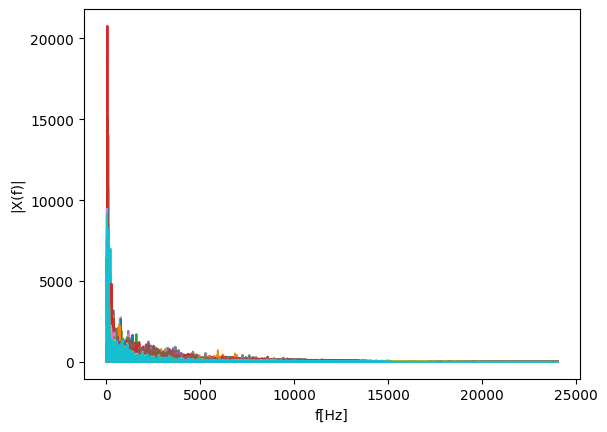

In [49]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

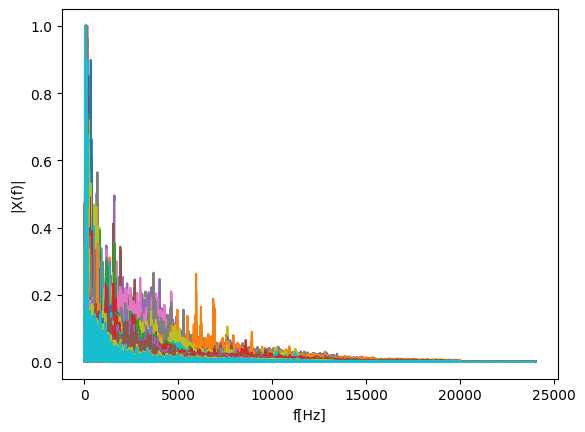

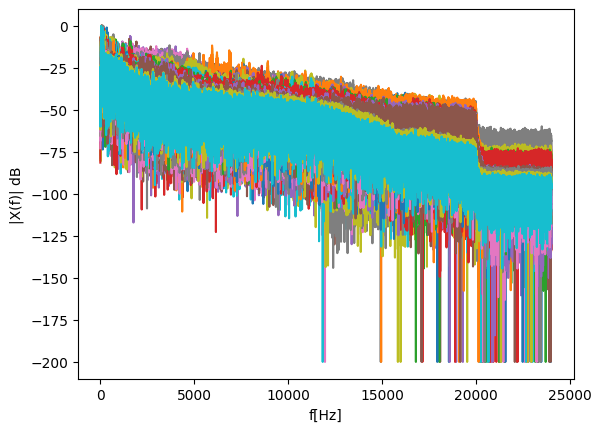

In [50]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [51]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

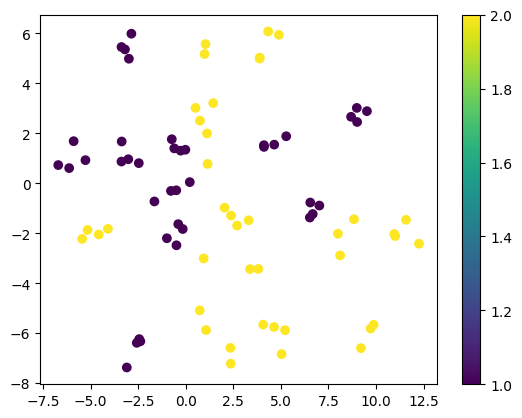

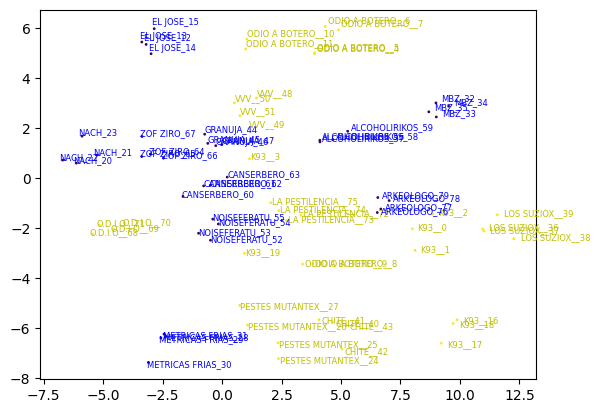

In [52]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

IndexError: ignored

In [ ]:
 link 16yxP3k7H_XJxUy8AkFoe101hLIMKI3Qt